## An Exploratory Data Analysis of Accidents Using Python, NumPy and Pandas.

This Notebook is to be used as a way to deepen the understanding about Pandas and Datasets using Visualizers as well as code.

The links and refferals are provided below.

Learn EDA through Blog/Notebook: https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas <br>Traffic Accident Dataset: https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents

Talking about Analysis, this notebook focuses on using several libraries, logic and intuition to be answering a few questions such as, which factor caused the accident?, are there any fatalities? if yes how many?, etc.

## Import Libraries.

Pandas as pd --> Pandas is used for creating a Dataframe(refferd as "df"), manipulating and cleaning of data.<br>
<br>
NumPy as np --> NumPy(Numerical Python) is a well known library for creating and performing Mathematical functions over Multi-Dimensional Arrays.<br>

Matplotlib --> A plotting library which also uses the capabilities of NumPy. Provides good visuals. <br>
<br>
Seaborn as sns --> Seaborn is a visualization library that is built on top of Matplotlib. It provides Plots that are statistically more sophisticated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Create Dataframe using properties of Pandas.
A Dataframe is a Data Structure that organizes 2 or Multi-Dimensional arrays in the form of Rows and Columns.<br>
This gives a better visualization of our ".csv" dataset.

In [2]:
df = pd.read_csv("traffic_accidents.csv")
# .head() property is used to display first 5 rows of the Dataframe.

df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


# Instances and Dimensionality
Once the Dataframe has been printed, observed rows are called "Instances", similarly Columns are called "features" of that Instance.<br>
<br>
Dimensionality refers to the number of Rows and Columns that the Dataframe consists. It is Denoted with "MxN", where "M" refers to the number of rows and "N" refers to the number of Columns.<br>
<br>
To Summarize:<br>
&emsp;After Loading Dataframe, Observed Rows == "Instances", Observed Columns == "Features"(of Instances).<br>
&emsp;Dimensionality == MxN == Number of Rows x Number of Columns.

In [3]:
# to check the dimensions of your Dataframe, use ".shape" method.

print(df.shape)

(209306, 24)


The above Output shows, we have 209306 rows and 24 columns,<br>
hence, the Dimension of this Dataframe is 209306x24

In [15]:
# Similary, we can print the names of all columns present using ".columns" method.

print(df.columns)

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')


As Displayed, These are the Column/Feature names of all 24 Entries

In [16]:
# The ".info()" method can be used to display some general information about these Featues/Columnsabs

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

Since, Each Instance(Row) should have a Respective Feature(A Column Value), this is a good practice to check if there are any missing values<br>
Here, we can see each Column has 209306 Entries/Instances, this means there are no missing values since we had checking the dimension of our Dataframe previously.

## Datatype and corresponding Values.

&emsp;The 4 Total Datatypes for out Features are "bool", "float64", "int64" and object(14).<br>
<br>
Here, we observe that there are: <br>
&emsp;float64 - 6,<br>
&emsp;int64 - 4,<br>
&emsp;object - 14<br>
&emsp;and bool - 0 observaions.

To change the column datatype, we use the function ".astype("new datatype")"<br>
Since, this Dataset does not contain any boolean data, changing the datatypes is not necessary.<br>

In [20]:
# The ".describe()" method shows basic statistical characteristics of each numerical feature(int64 and float64),
# like, the number of non-missing values, mean,
# standard deviation, range, median, 1/4th(0.25) and 3/4(0.75) Quartiles.

df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


Since, this was the description of all "Numerical" features,<br>
The Non-Numerical features(object and bool) have to be explicitely specified, using the "include" parameter.

In [21]:
df.describe(include=[bool, object])

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
count,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306
unique,189087,19,12,6,18,20,6,7,7,2,2,3,40,5
top,12/29/2020 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,Y,"OVER $1,500",UNABLE TO DETERMINE,NO INDICATION OF INJURY
freq,10,123944,164700,134109,64157,77753,204590,155905,171730,117376,199324,147313,58316,154789


for Categorial(type Object) and Boolen(type bool) features, we cn use the "value_counts()" method.

In [22]:
df['damage'].value_counts()

damage
OVER $1,500      147313
$501 - $1,500     41210
$500 OR LESS      20783
Name: count, dtype: int64

Above Cell shows the distribution of "damage" feature and Frequency of its values.<br>
<br>
As we can see, there are 147313 accidents which cost more than $1500 to recover.<br>
This value can also be calculated(Out of 100) using "normalize=True" method.

In [23]:
df['damage'].value_counts(normalize=True)

damage
OVER $1,500      0.703816
$501 - $1,500    0.196889
$500 OR LESS     0.099295
Name: proportion, dtype: float64

This shows a Neater and a simpler Conclusion on the Recovery cost of an accident being expensive.<br>
As we can see Majority(hence, the 70% figure) of the accidents are over $1500

## Sorting.

Here we were be looking after the methods required to sort, index, manipulate, etc our Dataframe 

We can sort the Dataframe by a single column in either Ascending or Descending order using<br>
".sort_value(by= , ascending= )" <br>
here, the column to be sorted by goes inside "by= ", the parameter "ascending= " is really intuiative.

In [4]:
df.sort_values(by='crash_date', ascending=True).head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
38111,01/01/2016 01:03:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,2.0,1,6,1
174142,01/01/2016 02:00:00 AM,UNKNOWN,UNKNOWN,UNKNOWN,OTHER NONCOLLISION,OTHER,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,2,6,1
91236,01/01/2016 02:05:00 AM,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,2,6,1
60865,01/01/2016 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,17,6,1
45854,01/01/2016 06:45:00 PM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,6.0,18,6,1


In the above practice, we have sorted the Dataframe about the "crash date"(referred as 'crash_date'), <br>
this showed us the first accident recorded in this DataSet (01/01/2016).<br>
<br>
The same can be done to look after a range of date/conditions where the most accidents/injuries have been caused.

In [5]:
df.sort_values(by='injuries_total', ascending=False).head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
91225,10/17/2018 06:20:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,CENTER TURN LANE,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,21.0,0.0,0.0,21.0,0.0,0.0,6,4,10
50879,12/13/2021 09:45:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,21.0,0.0,2.0,19.0,0.0,0.0,9,2,12
58313,02/07/2020 09:36:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,19.0,0.0,1.0,18.0,0.0,10.0,9,6,2
10830,11/23/2022 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DUSK,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,FATAL,17.0,2.0,6.0,8.0,1.0,0.0,17,4,11
192581,05/25/2019 09:56:00 PM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,16.0,0.0,0.0,16.0,0.0,1.0,21,7,5


As it is observed, most total injuries in a day were 21 on 10/17/2018; followed by 12/13/2021 

A more Specific method of sort can also be implemented by passing the column names followed by their corresponding 'ascending= ' values.

In [7]:
df.sort_values(by=['crash_month','injuries_total'], ascending=[True, False]).head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
149432,01/04/2020 07:27:00 PM,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,9.0,0.0,0.0,5.0,4.0,2.0,19,7,1
86795,01/01/2024 03:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAWN,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,8.0,0.0,1.0,7.0,0.0,0.0,15,2,1
101131,01/25/2019 02:58:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,8.0,0.0,0.0,8.0,0.0,1.0,2,6,1
65606,01/21/2024 05:55:00 PM,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,"REPORTED, NOT EVIDENT",7.0,0.0,0.0,0.0,7.0,0.0,17,1,1
114896,01/08/2019 06:00:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,7.0,0.0,1.0,6.0,0.0,2.0,6,3,1


In the Above Cell, we looked for Instances(Row values) which are Recent(relative to the Dataframe, since ascending=True) <br>
And, the total injuries are in descending order falling on that corresponding date(On 1st month of 2020, total injuries were 9).

# Indexing and Retrieving.

Dataframes can be indexed in several ways, say we want to index a single column, target df['column name'] <br>
To check at what hour were the most number of accidents occuring, we use the mean() function.

In [5]:
print(df['crash_hour'].mean())

13.373047117617268


We can see the average time for accidents occuring is 13.3(around 1:20pm), this can be due to the fact that schools and junior colleges get over by 1pm, the increased volume of drivers(or parents) can increase the chances of accidents.

We can check the most frequent time at which accidents occur using the '.value_counts()' method.<br>
This will not only show us the total number of accidents but also the corresponding time.<br>
We can cross-check the most frequent crash hour by '.mode()' function as well.

In [6]:
print(df['crash_hour'].value_counts())

crash_hour
17    16097
16    16025
15    15894
18    13431
14    13349
13    11949
12    11726
8     11381
11    10052
19     9683
7      9405
9      9300
10     8990
20     8219
21     7472
22     7035
23     5943
6      4772
0      4487
1      3729
2      3080
5      2819
3      2364
4      2104
Name: count, dtype: int64


In [7]:
print(df['crash_hour'].mode())

0    17
Name: crash_hour, dtype: int64


As displayed by both, the '.value_counts()' method and '.mode()' function, we come to know that 17th hour(5 o'clock) is the time when most accidents have occured.<br>
<br>
The reason can be the sudden flow and rush caused by corporate employees(having a 9-5 job.), Increase in the Volume of Vehicles means Increased chances of having an Accident.

### Boolean Indexing

The concept of "Boolean Indexing" is used to get answers based on specific conditions.<br>
<br>
This can be initiated using, df[P(df['Name'])], here "P" is the logical condition. 

Say we want to check what was the primary cause of accidents('prim_contributory_cause') at the mean time(13th hour) using boolean indexing.

In [8]:
print(df[df['crash_hour'] == 13]['prim_contributory_cause'])

0                   UNABLE TO DETERMINE
25        FAILING TO YIELD RIGHT-OF-WAY
36                  UNABLE TO DETERMINE
45                  UNABLE TO DETERMINE
96                       NOT APPLICABLE
                      ...              
209238            FOLLOWING TOO CLOSELY
209257    FAILING TO YIELD RIGHT-OF-WAY
209292    FAILING TO YIELD RIGHT-OF-WAY
209301              UNABLE TO DETERMINE
209303              RELATED TO BUS STOP
Name: prim_contributory_cause, Length: 11949, dtype: object


This showed all the Primary Causes that lead to an Accident at 13th hour. Similarly we can answer questions such as "what was the most prominant cause of accident at the mean hour?", "Does road defect and crash hour have any relation?, if yes then by how much?" "how many injuries were caused at that road condition and time?", etc.

In [10]:
print(df[df['crash_hour'] == 13]['prim_contributory_cause'].mode())

0    UNABLE TO DETERMINE
Name: prim_contributory_cause, dtype: object


In [12]:
print(df[(df['crash_hour'] == 13) & (df['road_defect'] == 'NO DEFECTS')]['injuries_total'].max())

8.0


In [14]:
print(df[(df['crash_hour'] == 13) & (df['road_defect'] == 'UNKNOWN')]['injuries_total'].max())

7.0


In [16]:
print(df[(df['crash_hour'] == 13) & (df['road_defect'] == 'OTHER')]['injuries_total'].max())

2.0


### Results

1. The Primary Cause of Accidents at Mean Crash Hour(13th hour/1 o'clock) was "UNABLE TO DETERMINE".
2. The Maximum number of Accidents caused due to No Road Defect at Crash Hour is 8.
3. The Maximum number of Accidents caused due to Unknown Defect at Crash Hour is 7.
4. The Maximum number of Accidents caused due to 'Other' Defect at Crash Hour is 2.
<br>
<br>
This suggests that, The drivers could have been driving recklessly considering the fact that they knew there are no Road Defects ahead and the time of incident was also the time of rush/hurry caused by students/wards.

## Indexing by Column or Row using LOC and ILOC.

Dataframes can be indexed using Column name(Label) or Row name(index) or also the seriel number of Row.

The ".loc" method can be used to index by name, whereas,<br>
".iloc" method is used for indexing by number.<br>
<br>
.loc --> Give the range of values representing row names(inner and outer value is included, such as 0:3, both 0 and 3 are included and correspond to the row index.) and range of column names(again inner and outer values are included just like Row's).<br>
<br>
.iloc --> Give the range of row and column indexes, this time max value is not considered.

say, we want to check the first 5 values of columns "weather_condition" to "road_defect"

In [18]:
df.loc[0:5, "weather_condition":"road_defect"]

,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect
0,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN
1,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS
2,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS
3,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS
4,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN
5,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN


In [19]:
df.iloc[0:6, 2:9]

,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect
0,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN
1,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS
2,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS
3,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS
4,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN
5,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN


As Observed, for .loc[] method:<br>
&emsp;0:5 --> rows from 0th and 5th index(both included) and<br>
&emsp;"weather_condition":"road_defect" --> both included.<br>
<br>
And, for .iloc[]:<br>
&emsp;0:6 --> Since while using ".iloc" maximum index is excluded.<br>
&emsp;2:9 --> Again, the 8th index was "road_defect" but the maximum is not included.

### Applying Functions to Cells, Rows and Columns.

To apply functions to each column, use '.apply()'

In [3]:
df.apply(np.max)

crash_date                       12/31/2024 12:55:00 PM
traffic_control_device                            YIELD
weather_condition                               UNKNOWN
lighting_condition                              UNKNOWN
first_crash_type                                TURNING
trafficway_type                          Y-INTERSECTION
alignment                         STRAIGHT ON HILLCREST
roadway_surface_cond                                WET
road_defect                                WORN SURFACE
crash_type                       NO INJURY / DRIVE AWAY
intersection_related_i                                Y
damage                                      OVER $1,500
prim_contributory_cause                         WEATHER
num_units                                            11
most_severe_injury                REPORTED, NOT EVIDENT
injuries_total                                     21.0
injuries_fatal                                      3.0
injuries_incapacitating                         

These are the maximum values of each Feature. For type "object", most number of reccuring value(mod) is been considered.

The ".apply()" function also takes lambda functions, these can be used to check specific conditions such as, "dates which are in the year 2016"

In [5]:
df[df['crash_date'].apply(lambda crash: "2016" in crash)].head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
11,11/02/2016 04:49:00 PM,TRAFFIC SIGNAL,RAIN,DUSK,ANGLE,OTHER,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,16,4,11
96,12/06/2016 01:15:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,4.0,13,3,12
110,01/03/2016 02:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,1,1
136,07/13/2016 02:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,4,7
137,07/20/2016 04:45:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,CENTER TURN LANE,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,16,4,7


### Map

Map method can be used to replace values in a column by passing a dictionary of the form:<br>
&emsp;{old value : new value}

In [37]:
d = {"Y": "YES", "N": "NO"}
df["intersection_related_i"] = df["intersection_related_i"].map(d)
df.loc[0:6, "intersection_related_i"]

0    YES
1    YES
2    YES
3    YES
4    YES
5     NO
6    YES
Name: intersection_related_i, dtype: object

### Grouping

Grouping Works like:<br>
.groupby(by="grouping_columns")[columns to show].desiredfunction()<br>
<br>
grouping_columns = the target column whos statistics is to be studied<br>
columns to show = the (list of columns if needed) columns who are to be used as columns when comparing for the "grouping column"

We can use this to compare how Weather Conditions and Injuries Dealt are related.

In [38]:
columns_to_show = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating']
df.groupby(by='weather_condition')[columns_to_show].describe(percentiles=[])

injuries_total                                      \
                                  count      mean       std  min  50%   max   
weather_condition                                                             
BLOWING SAND, SOIL, DIRT            1.0  0.000000       NaN  0.0  0.0   0.0   
BLOWING SNOW                      127.0  0.314961  0.752781  0.0  0.0   4.0   
CLEAR                          164700.0  0.390401  0.812737  0.0  0.0  21.0   
CLOUDY/OVERCAST                  7533.0  0.369308  0.745190  0.0  0.0  11.0   
FOG/SMOKE/HAZE                    360.0  0.444444  0.829285  0.0  0.0   5.0   
FREEZING RAIN/DRIZZLE             510.0  0.460784  0.864851  0.0  0.0   6.0   
OTHER                             627.0  0.483254  0.821607  0.0  0.0   5.0   
RAIN                            21703.0  0.411510  0.808552  0.0  0.0  15.0   
SEVERE CROSS WIND GATE             32.0  0.250000  0.762001  0.0  0.0   4.0   
SLEET/HAIL                        308.0  0.461039  0.851388  0.0  0.0   6.0   
SNOW                             6871.0  0.308543  0.698708  0.0  0.0   7.0   
UNKNOWN                          6534.0  0.166054  0.494394  0.0  0.0   6.0   

                         injuries_fatal                                     \
                                  count      mean       std  min  50%  max   
weather_condition                                                            
BLOWING SAND, SOIL, DIRT            1.0  0.000000       NaN  0.0  0.0  0.0   
BLOWING SNOW                      127.0  0.000000  0.000000  0.0  0.0  0.0   
CLEAR                          164700.0  0.001961  0.048933  0.0  0.0  3.0   
CLOUDY/OVERCAST                  7533.0  0.001726  0.041509  0.0  0.0  1.0   
FOG/SMOKE/HAZE                    360.0  0.002778  0.052705  0.0  0.0  1.0   
FREEZING RAIN/DRIZZLE             510.0  0.001961  0.044281  0.0  0.0  1.0   
OTHER                             627.0  0.000000  0.000000  0.0  0.0  0.0   
RAIN                            21703.0  0.001889  0.049382  0.0  0.0  3.0   
SEVERE CROSS WIND GATE             32.0  0.031250  0.176777  0.0  0.0  1.0   
SLEET/HAIL                        308.0  0.000000  0.000000  0.0  0.0  0.0   
SNOW                             6871.0  0.000437  0.020892  0.0  0.0  1.0   
UNKNOWN                          6534.0  0.000918  0.030291  0.0  0.0  1.0   

                         injuries_incapacitating                           \
                                           count      mean       std  min   
weather_condition                                                           
BLOWING SAND, SOIL, DIRT                     1.0  0.000000       NaN  0.0   
BLOWING SNOW                               127.0  0.039370  0.232364  0.0   
CLEAR                                   164700.0  0.039951  0.239980  0.0   
CLOUDY/OVERCAST                           7533.0  0.033055  0.217029  0.0   
FOG/SMOKE/HAZE                             360.0  0.013889  0.117193  0.0   
FREEZING RAIN/DRIZZLE                      510.0  0.041176  0.273719  0.0   
OTHER                                      627.0  0.057416  0.276713  0.0   
RAIN                                     21703.0  0.036999  0.228316  0.0   
SEVERE CROSS WIND GATE                      32.0  0.031250  0.176777  0.0   
SLEET/HAIL                                 308.0  0.042208  0.231489  0.0   
SNOW                                      6871.0  0.023577  0.183838  0.0   
UNKNOWN                                   6534.0  0.015305  0.142397  0.0   

                                    
                          50%  max  
weather_condition                   
BLOWING SAND, SOIL, DIRT  0.0  0.0  
BLOWING SNOW              0.0  2.0  
CLEAR                     0.0  7.0  
CLOUDY/OVERCAST           0.0  4.0  
FOG/SMOKE/HAZE            0.0  1.0  
FREEZING RAIN/DRIZZLE     0.0  4.0  
OTHER                     0.0  2.0  
RAIN                      0.0  5.0  
SEVERE CROSS WIND GATE    0.0  1.0  
SLEET/HAIL                0.0  2.0  
SNOW                      0.0  

We grouped "by=weather_conditions" and compared it to "columns to show" hence the 3 parent columns(injuries_total, injuries_fatal, injuries_incapacitating).

For a more specific/custom function, we use the ".agg()" function and pass the list of functions which are required.

In [47]:
df.groupby(by='weather_condition')[columns_to_show].agg(["mean", "max"])

injuries_total       injuries_fatal       \
                                   mean   max           mean  max   
weather_condition                                                   
BLOWING SAND, SOIL, DIRT       0.000000   0.0       0.000000  0.0   
BLOWING SNOW                   0.314961   4.0       0.000000  0.0   
CLEAR                          0.390401  21.0       0.001961  3.0   
CLOUDY/OVERCAST                0.369308  11.0       0.001726  1.0   
FOG/SMOKE/HAZE                 0.444444   5.0       0.002778  1.0   
FREEZING RAIN/DRIZZLE          0.460784   6.0       0.001961  1.0   
OTHER                          0.483254   5.0       0.000000  0.0   
RAIN                           0.411510  15.0       0.001889  3.0   
SEVERE CROSS WIND GATE         0.250000   4.0       0.031250  1.0   
SLEET/HAIL                     0.461039   6.0       0.000000  0.0   
SNOW                           0.308543   7.0       0.000437  1.0   
UNKNOWN                        0.166054   6.0       0.000918  1.0   

                         injuries_incapacitating       
                                            mean  max  
weather_condition                                      
BLOWING SAND, SOIL, DIRT                0.000000  0.0  
BLOWING SNOW                            0.039370  2.0  
CLEAR                                   0.039951  7.0  
CLOUDY/OVERCAST                         0.033055  4.0  
FOG/SMOKE/HAZE                          0.013889  1.0  
FREEZING RAIN/DRIZZLE                   0.041176  4.0  
OTHER                                   0.057416  2.0  
RAIN                                    0.036999  5.0  
SEVERE CROSS WIND GATE                  0.031250  1.0  
SLEET/HAIL                              0.042208  2.0  
SNOW                                    0.023577  5.0  
UNKNOWN                                 0.015305  4.0

### Summary Tables

If we want to see observations in context of multiple variables, we can use the "crosstab" function over panda's shortcut(here pd.)

In [39]:
pd.crosstab(df['road_defect'], df['intersection_related_i'])

intersection_related_i,NO,YES
road_defect,,
DEBRIS ON ROADWAY,10,129
NO DEFECTS,7955,163775
OTHER,65,847
"RUT, HOLES",45,696
SHOULDER DEFECT,19,339
UNKNOWN,1840,32586
WORN SURFACE,48,952


We can use "normalize=True" at places where we want to make a number more comparable or to put in the respective context, in other words, it is a relative measure of how well the data is compared to the values in the dataset.

In [40]:
pd.crosstab(df['road_defect'], df['intersection_related_i'], normalize=True)

intersection_related_i,NO,YES
road_defect,,
DEBRIS ON ROADWAY,0.000048,0.000616
NO DEFECTS,0.038007,0.782467
OTHER,0.000311,0.004047
"RUT, HOLES",0.000215,0.003325
SHOULDER DEFECT,0.000091,0.001620
UNKNOWN,0.008791,0.155686
WORN SURFACE,0.000229,0.004548


From these summary tables, we can see that majority of the accidents involving No Road Defects have an Intersection(The accident took place between vehicles travelling from opposite directions).

### Pivot Tables

We can use pivot tables in pandas as well using:<br> 
&emsp;pivot_table(value, index, aggfunction)<br>
<br>
"value" can be the columns(list of them if required) who are also going to be columns in dataframe.<br>
"index"(also to be a list) is the rows for dataframe<br>
"aggfunction" is the function which is to be used for comparison between columns and row.

Say we want to compare Road Defects with Injuries Caused.

In [55]:
df.pivot_table(
    ['injuries_total', 'injuries_reported_not_evident'],
    ['road_defect'],
    aggfunc="mean"
)

,injuries_reported_not_evident,injuries_total
road_defect,,
DEBRIS ON ROADWAY,0.143885,0.467626
NO DEFECTS,0.124818,0.394060
OTHER,0.125000,0.346491
"RUT, HOLES",0.126856,0.257760
SHOULDER DEFECT,0.159218,0.519553
UNKNOWN,0.102539,0.324958
WORN SURFACE,0.184000,0.488000


### DataFrame Transformations

We can add columns in dataframe using "insert(loc, column, value)" method.<br>
<br>
"loc" parameter sets the location of column, it is going to be after the number which is inserted.<br>
"column" parameter is name of the column which we want to insert,<br>
"value" is the column which we want.

Say, we did not have a "injuries_total" column and wanted a column to report it,<br>
We would add the values of columns [injuries_fatal, injuries_incapacitating, injuries_non_incapacitating, injuries_reported_not_evident]

In [13]:
total_injuries = (
    df['injuries_fatal'] + df['injuries_incapacitating'] + df['injuries_reported_not_evident']
)

df.insert(loc=len(df.columns), column='injuries_fatal_incapacitating_not_evident', value=total_injuries)
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,Total_injured,inj,injuries_fatal_incapacitating_not_evident
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,13,7,7,0.0,0.0,0.0
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,2.0,0,1,8,0.0,0.0,0.0
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,10,5,12,0.0,0.0,0.0
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,5.0,0.0,0.0,19,4,8,5.0,0.0,0.0
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,14,7,8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,2.0,13,4,9,0.0,0.0,0.0
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,2.0,14,3,7,0.0,0.0,0.0
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,2.0,0.0,0.0,0.0,13,4,10,2.0,2.0,2.0
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,1.0,0.0,1.0,15,2,6,1.0,0.0,0.0


Here, we created 2 columns, "inj" and "injuries_fatal_incapacitating_not_evident"", suppose the first was created by mistake or any flaw is found, This can be reverted by deleting the column.

To delete a row or column, use ".drop(index, axis, inplace)",<br>
<br>
index = the range of columns/rows to be deleted(pass a list of name of column or row).<br>
axis = 1/0, if you want to delete columns use 1, if nothing is mentioned or you want to delete rows, 0.<br>
inplace = determines whether to change the "original" dataframe or not, if False, it is going to return a new dataframe with dropped rows/columns.<br>
<br>
If inplace=True, it makes changes to the original dataframe.

In [15]:
df.drop(["inj"], axis=1, inplace=True)
df

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,Total_injured,injuries_fatal_incapacitating_not_evident
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,3.0,13,7,7,0.0,0.0
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,2.0,0,1,8,0.0,0.0
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,3.0,10,5,12,0.0,0.0
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,5.0,0.0,0.0,19,4,8,5.0,0.0
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,3.0,14,7,8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,2.0,13,4,9,0.0,0.0
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,2.0,14,3,7,0.0,0.0
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,2.0,0.0,0.0,0.0,13,4,10,2.0,2.0
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,1.0,0.0,1.0,15,2,6,1.0,0.0


To delete rows, use their index's, the numbers included are going to be dropped only and not anything in between them, like in the below cell only row 2 and 4 are dropped.

In [17]:
df.drop([2,4], inplace=False).head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,Total_injured,injuries_fatal_incapacitating_not_evident
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,3.0,13,7,7,0.0,0.0
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,2.0,0,1,8,0.0,0.0
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,5.0,0.0,0.0,19,4,8,5.0,0.0
5,09/06/2023 12:59:00 AM,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,0.0,0.0,2.0,0.0,0.0,0,4,9,2.0,0.0
6,12/20/2022 11:45:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,2.0,11,3,12,0.0,0.0


## Predicting Accidents Using Visualization.

Firstly, we create a summary table, then we show visually using Plots.

In [4]:
pd.crosstab(df['road_defect'], df['injuries_total'], margins=True)

injuries_total,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,All
road_defect,,,,,,,,,,,,,,,,,,,,
DEBRIS ON ROADWAY,95,30,9,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,139
NO DEFECTS,125870,32147,8844,2984,1146,419,192,71,27,11,6,4,3,0,3,0,1,1,1,171730
OTHER,689,159,46,12,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,912
"RUT, HOLES",601,103,27,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,741
SHOULDER DEFECT,239,81,21,8,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,358
UNKNOWN,26625,5628,1441,459,174,60,20,8,3,2,1,1,0,1,1,1,0,0,1,34426
WORN SURFACE,670,230,59,31,7,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1000
All,154789,38378,10447,3505,1338,488,212,80,30,14,7,5,3,1,4,1,1,1,2,209306


In the Cell Above, We saw how total Injuries and Weather Conditions are related, To further analyse this and make it easier to Present/Potray we can use plotting tools such as Seaborn and MatplotLib.

When plotting using Seaborn, use "sns.countplot(x="Name of Columns that go on X-axis", hue="Name of Columns that go on Y-xis", data="name of DataFrame)<br>
Hence, the structure:<br>
&emsp;sns.countplot(x="", hue="", data="")

<Axes: xlabel='injuries_total', ylabel='count'>

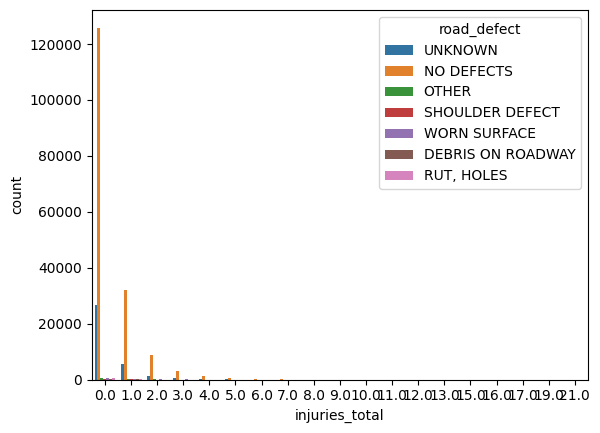

In [5]:
sns.countplot(x='injuries_total', hue='road_defect', data=df)

If you are not Working with "Jupyter Notebooks", use Matplotlib for plotting,<br>
After giving the plotting conditions using Seaborn, call plt.show() (plt --> Naming shortcut for matplotlib.pyplot).

We saw that number of injuries caused on "No Defects" type road-defect was 0 and also was majority of the accidents that took place. This suggests, Over Roads that had no work to be done(hence having no defect) had Lower Accidents.<br>
<br>
Whereas, when it comes to getting any type of injury during an Accident,<br>
"No defect" road defect turns out to be the highest in count as well.<br>

This suggests, Most people prefer using vehicles on Roads with No Defects and can achieve higher Speeds(this reduces the time required to reach a place.) and hence coming into an Accident.

Considering the Result we achieved, It can be a good practice to check Injury Counts with Weather Conditions as well.<br>
<br>
For this, We go with the same approach as we did for "Road Defects".

In [7]:
pd.crosstab(df['injuries_total'], df['weather_condition'], margins=True)

weather_condition,"BLOWING SAND, SOIL, DIRT",BLOWING SNOW,CLEAR,CLOUDY/OVERCAST,FOG/SMOKE/HAZE,FREEZING RAIN/DRIZZLE,OTHER,RAIN,SEVERE CROSS WIND GATE,SLEET/HAIL,SNOW,UNKNOWN,All
injuries_total,,,,,,,,,,,,,
0.0,1,101,121288,5558,253,350,423,15523,27,209,5371,5685,154789
1.0,0,18,30330,1423,72,117,131,4428,4,74,1091,690,38378
2.0,0,4,8425,381,24,25,54,1134,0,15,278,107,10447
3.0,0,2,2857,119,5,9,13,385,0,5,76,34,3505
4.0,0,2,1081,36,5,5,5,151,1,3,37,12,1338
5.0,0,0,403,9,1,3,1,53,0,1,12,5,488
6.0,0,0,185,3,0,1,0,16,0,1,5,1,212
7.0,0,0,71,2,0,0,0,6,0,0,1,0,80
8.0,0,0,26,1,0,0,0,3,0,0,0,0,30


<Axes: xlabel='weather_condition', ylabel='count'>

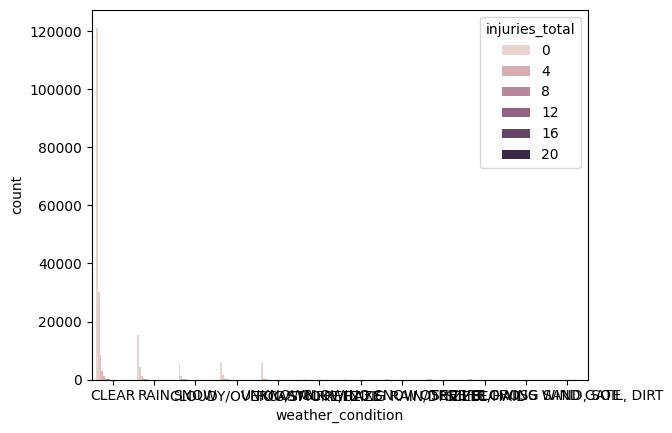

In [9]:
sns.countplot(x='weather_condition', hue='injuries_total', data=df)

From the Above Results, the following conclusions can be drawn:<br>
&emsp;1. Most Accidents Took place On "CLEAR" Weather Condition(164700), this can be because people(usually families) go out for drives.<br>
&emsp;2. Followed by "CLEAR", "RAIN" weather condition has the most number of injuries(21703). This can be due to Physical Limitations, such as Tires Slipping Off, drivers not being able to stop a vehicle on time(using braking), Lack of Visiblility, etc.

As a measure of getting more precise with out answer, we can compare the existing Conclusions with the results provided over Lighting Conditions.

In [12]:
pd.crosstab(df['injuries_total'], df['lighting_condition'], margins=True)

lighting_condition,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,All
injuries_total,,,,,,,
0.0,5372,37659,2698,100573,4687,3800,154789
1.0,1454,10522,741,24025,1192,444,38378
2.0,398,3161,187,6351,288,62,10447
3.0,133,1199,72,1983,100,18,3505
4.0,46,502,21,730,33,6,1338
5.0,22,180,1,267,13,5,488
6.0,7,97,3,101,3,1,212
7.0,2,35,0,40,3,0,80
8.0,2,9,1,16,2,0,30


Here, we can see most Accidents are caused during daylight, this supports our conclusions from previous studies.<br>

Families Like travelling during the daytime("lighting_condition" feature) and on Clear Weather conditions("weather_condition" feature) over roads that do not face any Defects("road_defect" feature).<br>
<br>
More conclusions can be drawn from these results and can assist this Work.

Since, We cannot understand the total injuries based on lighting condition after 3 - 4 injuries,
to solve this, let us make a column which contains the number of injuries
only after 3 - 4. Using astype(int) gives a numeric value in row.

In [11]:
df['multiple_injuries'] = (df['injuries_total'] > 4).astype(int)
pd.crosstab(df['multiple_injuries'], df['lighting_condition'], margins=True)

lighting_condition,DARKNESS,"DARKNESS, LIGHTED ROAD",DAWN,DAYLIGHT,DUSK,UNKNOWN,All
multiple_injuries,,,,,,,
0,7403,53043,3719,133662,6300,4330,208457
1,33,335,5,447,23,6,849
All,7436,53378,3724,134109,6323,4336,209306


<Axes: xlabel='lighting_condition', ylabel='count'>

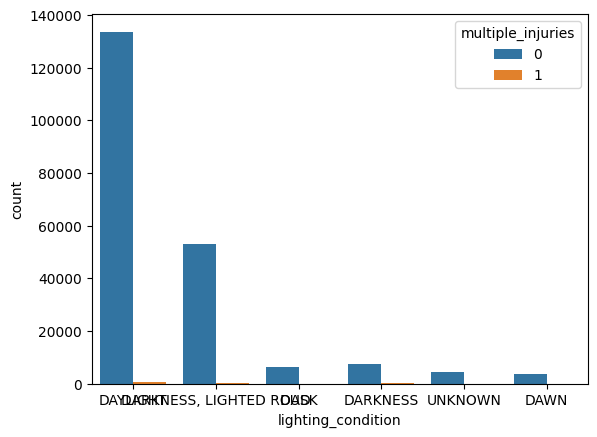

In [13]:
sns.countplot(x='lighting_condition', hue='multiple_injuries', data=df)

There are minimum injuries in daylight and multiple injuries are also caused at daylight, this can be due to the fact that, more people are active during the daytime as to in night, etc.<br>
<br>
The Results all Map over one another, whether using Summary tables to refer to values or using Plots(Graphs) to determine a conclusion Visually.